# The Dataset
This dataset is valuable for organizations and professionals looking to understand the impact of remote work on employee mental health and well-being.
It enables the analysis of correlations between factors such as stress, productivity, work-life balance, and company support to identify patterns aJecting employee
performance and satisfaction. It features 5,000 records from employees around the
globe, offering insights into crucial aspects such as: work environment (onsite,
hybrid, remote), stress level, availability of mental health resources, and job
satisfaction.
# Columns
# Quantitative Variables:
- Age: employee’s age in years.
- Years_of_Experience: years of professional experience.
- Hours_Worked_Per_Week: weekly hours worked.
- Number_of_Virtual_Meetings: number of weekly virtual meetings.
- Work_Life_Balance_Rating: rating of work-life balance (from 1 to 5).
- Social_Isolation_Rating: social isolation rating (from 1 to 5).
- Company_Support_for_Remote_Work: company support for remote work rating (from 1 to 5).
# Qualitative Variables:
- Gender: employee gender (Male, Female, Non-binary, Prefer not to say).
- Job_Role: employee’s job role (HR, Data Scientist, Sales, Developer,
and Others).
- Industry: industry of employment (Healthcare, IT, Finance, and
Others).
- Work_Location: work location (Remote, Onsite, Hybrid).
- Stress_Level: stress level (Low, Medium, High).
- Mental_Health_Condition: mental health condition (None, Anxiety,
Depression, Burnout).
- Access_to_Mental_Health_Resources: access to mental health
resources (Yes, No).
- Productivity_Change: productivity change (Increase, Decrease, No
Change).
- Satisfaction_with_Remote_Work: satisfaction with remote work
(Satisfied, Neutral, Unsatisfied).
- Physical_Activity: frequency of physical activity (None, Weekly,
Daily).
- Sleep_Quality: sleep quality (Poor, Average, Good).
- Region: geographic region (Europe, Asia, South America, North
America, Oceania, Africa)

# Section 1 

### Imports and Running the Dataset

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, pearsonr

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# trees
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# LabelEncoder

from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# Visualize dataset information
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [3]:
# Visualizing first 5 rows of the dataset just to get a feel of the data
data_head = data.head()
data_head

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


### Load that the "dataset.csv" dataset into a pandas dataframe, and take a look of the data of the dataset
- import necessary libraries
- import dataset
- verify if there are missing values
- verify if there are outliers in the target variable `charges` (use a boxplot, and the interquartile method)
  - visualize the result using a histogram
- visualize the remaining variables using histograms in subplots

In [4]:
print(data.isnull().sum())

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


In [5]:
data.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


# Section 2: Data Cleaning and Handling Missing Values

- In our Dataset it exists atleast some irrelevant columns
- For Example : Employee_ID (Not individual cases for the questions)
- We can check for missing values aswell



In [10]:

'''
# Load the dataset
file_path = 'C:/Users/migue/Desktop/Universidade/FCD/projeto/FCD-2024-25/dataset.csv'
data = pd.read_csv(file_path)

# Check for NaN values
print("Initial NaN values:\n", data.isnull().sum())

# Remove rows with any NaN values
data.dropna(inplace=True)

# Fill numerical columns with mean
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Fill categorical columns with mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Verify if there are any remaining NaN values
print("Remaining NaN values:\n", data.isnull().sum())

# Save the cleaned dataset
cleaned_file_path = 'C:/Users/migue/Desktop/Universidade/FCD/projeto/FCD-2024-25/cleaned_dataset.csv'
data.to_csv(cleaned_file_path, index=False)
'''

'\n# Load the dataset\nfile_path = \'C:/Users/migue/Desktop/Universidade/FCD/projeto/FCD-2024-25/dataset.csv\'\ndata = pd.read_csv(file_path)\n\n# Check for NaN values\nprint("Initial NaN values:\n", data.isnull().sum())\n\n# Remove rows with any NaN values\ndata.dropna(inplace=True)\n\n# Fill numerical columns with mean\nnumerical_cols = data.select_dtypes(include=[\'float64\', \'int64\']).columns\ndata[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())\n\n# Fill categorical columns with mode\ncategorical_cols = data.select_dtypes(include=[\'object\']).columns\ndata[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])\n\n# Verify if there are any remaining NaN values\nprint("Remaining NaN values:\n", data.isnull().sum())\n\n# Save the cleaned dataset\ncleaned_file_path = \'C:/Users/migue/Desktop/Universidade/FCD/projeto/FCD-2024-25/cleaned_dataset.csv\'\ndata.to_csv(cleaned_file_path, index=False)\n'

In [6]:
# Data Cleaning
# Dropping irrelevant columns (e.g., Employee_ID)
data.drop(columns=['Employee_ID'], inplace=True)


In [7]:
# Handle missing values (example: filling numerical missing values with the mean)
data.fillna(data.mean(numeric_only=True),inplace=True)

In [8]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


 As we can see the columns "Mental_Health_Condition" and "Physical_Activity" have some missing values, so we need to clean it in order to work with the data

Removing Data that has missing values...

In [9]:
critical_columns = ['Mental_Health_Condition', 'Physical_Activity']
data.dropna(subset=critical_columns, inplace=True)

# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64


# Descriptive Statistics


In [10]:
print(data.describe(include='all'))

                Age  Gender         Job_Role Industry  Years_of_Experience  \
count   2577.000000    2577             2577     2577          2577.000000   
unique          NaN       4                7        7                  NaN   
top             NaN  Female  Project Manager       IT                  NaN   
freq            NaN     664              401      412                  NaN   
mean      40.910749     NaN              NaN      NaN            17.760574   
std       11.258183     NaN              NaN      NaN             9.981957   
min       22.000000     NaN              NaN      NaN             1.000000   
25%       31.000000     NaN              NaN      NaN             9.000000   
50%       41.000000     NaN              NaN      NaN            18.000000   
75%       51.000000     NaN              NaN      NaN            26.000000   
max       60.000000     NaN              NaN      NaN            35.000000   

       Work_Location  Hours_Worked_Per_Week  Number_of_Virtual_

# Section 3: Questions for Analysis 

### Question 1: Correlation with Stress Levels and Mental Health Conditions

Stress Levels
Mental Health Conditions

- Preliminary  Exploration and cleaning inspecting missing values in the columns "Mental_Health_Conditions" and "Physical_Activity"
- Checking variable distributions "Hours_Worked_Per_Week" and "Work_Life_Balance_Rating" and removing outliers

Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64


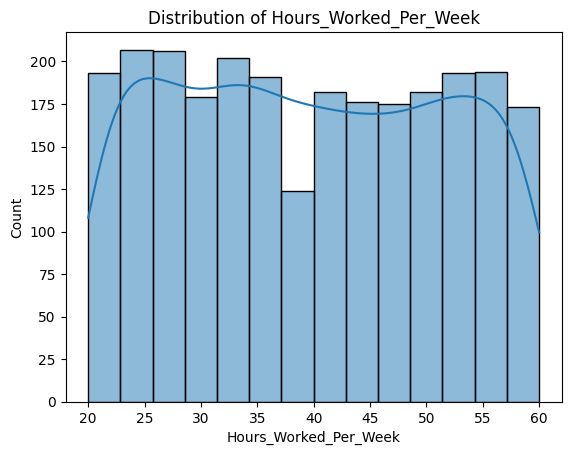

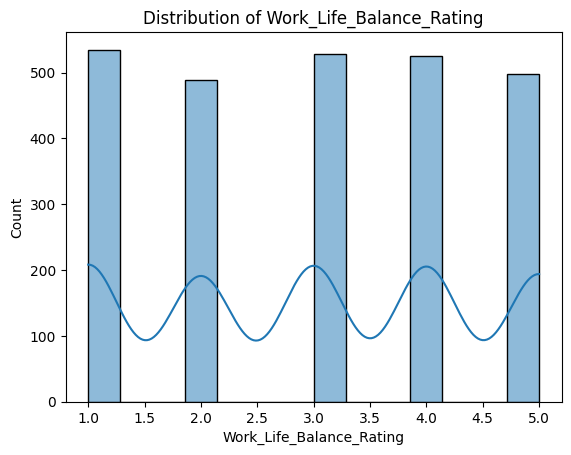

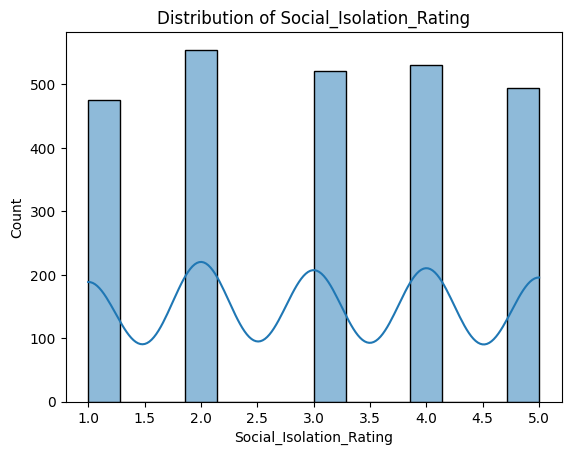

In [16]:
# Data Preprocessing
print(data.isnull().sum())

# Handling missing values (example: fill missing Mental_Health_Condition with 'Unknown')
data['Mental_Health_Condition'] = data['Mental_Health_Condition'].fillna('Unknown')

# Checking missing values




# Handling categorical variables
numerical_columns = ['Hours_Worked_Per_Week', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating']
for col in numerical_columns:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


- Correlation analysis
- For numerical values we could use Pearson correlation to quantify the relationships between numerical features and stress levels
- Creating a Heatmap to verify the values and get a conclusion about it

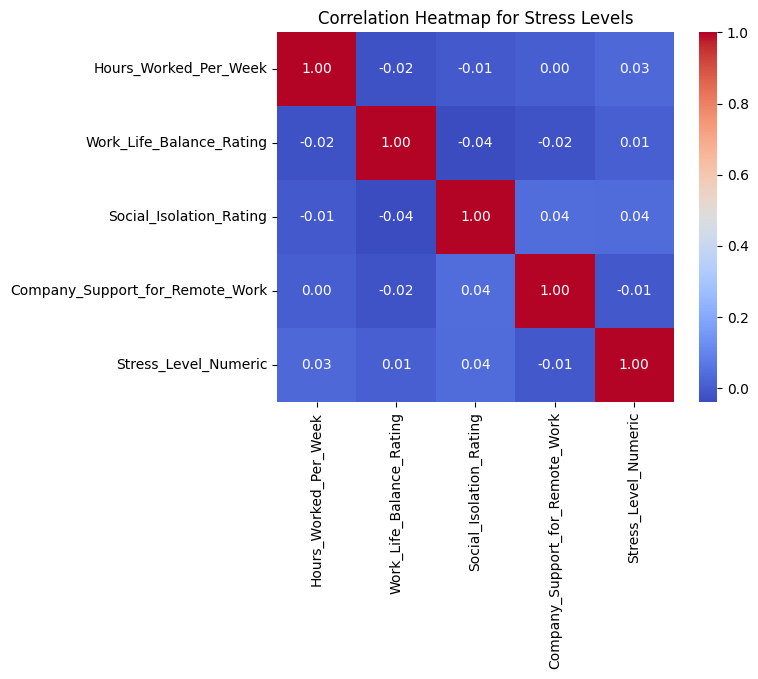

In [17]:
# Encode Stress_Level (High = 2, Medium = 1, Low = 0)
stress_mapping = {'High': 2, 'Medium': 1, 'Low': 0}
data['Stress_Level_Numeric'] = data['Stress_Level'].map(stress_mapping)

# Correlation matrix
numerical_columns = ['Hours_Worked_Per_Week', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work']
corr_matrix = data[numerical_columns + ['Stress_Level_Numeric']].corr()

# Display correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Stress Levels')
plt.show()

For Categorical Variables:

Use chi-square tests to identify associations between categorical variables (e.g., Work_Location, Access_to_Mental_Health_Resources) and stress levels.

In [50]:

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Work_Location'], data['Stress_Level'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Work_Location and Stress_Level: Chi2 = {chi2}, P-value = {p}")


Chi-Square Test for Work_Location and Stress_Level: Chi2 = 0.945154365840772, P-value = 0.9179951868063585


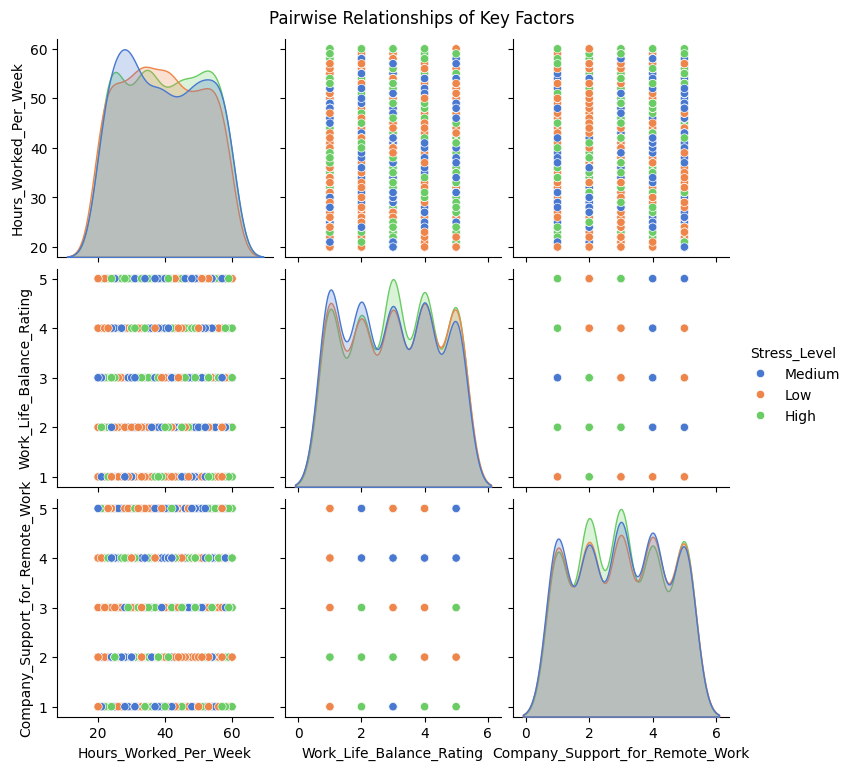

In [20]:
# Pairplot for key numerical variables and stress levels

sns.pairplot(data, vars=['Hours_Worked_Per_Week', 'Work_Life_Balance_Rating', 'Company_Support_for_Remote_Work'],
             hue='Stress_Level', palette='muted', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Key Factors', y=1.02)
plt.show()

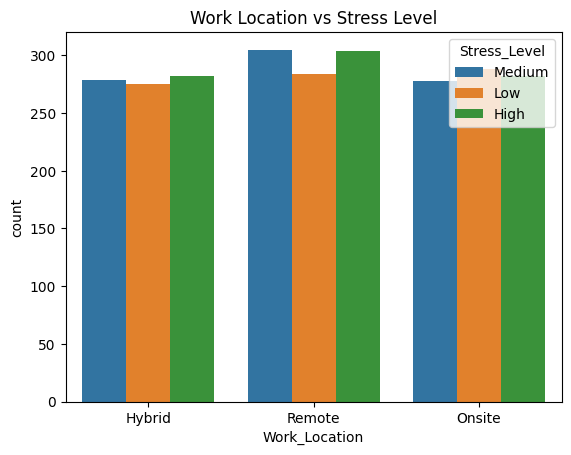

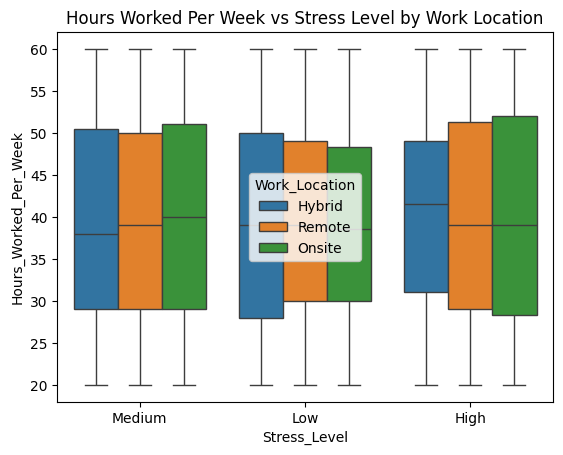

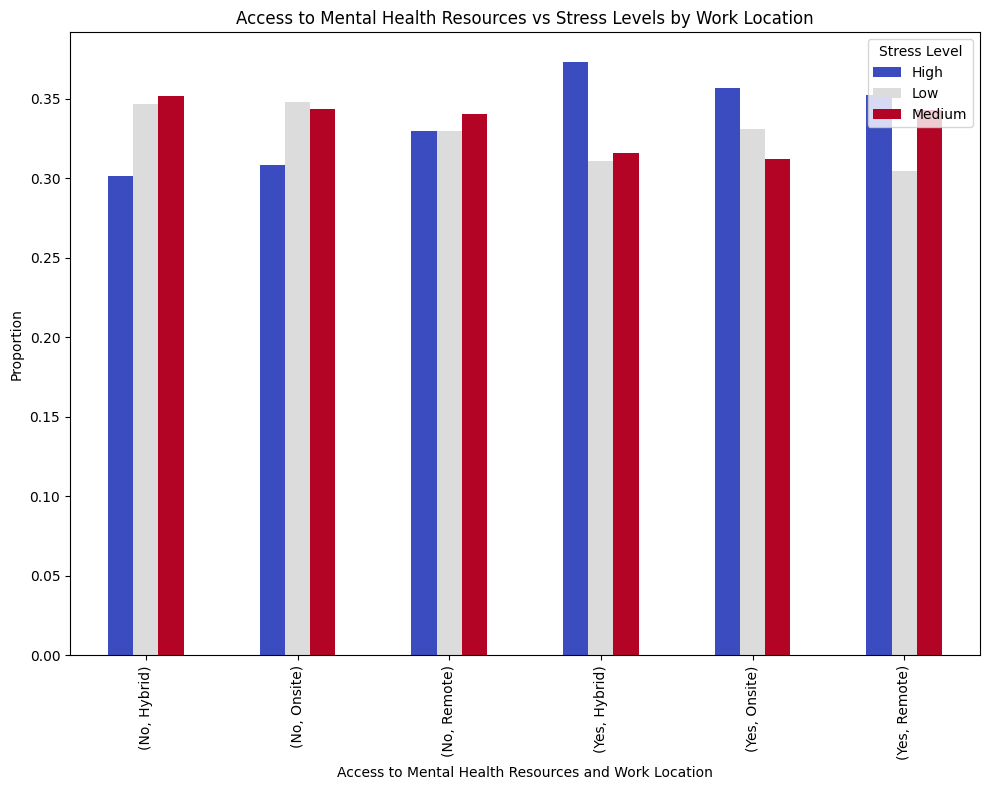

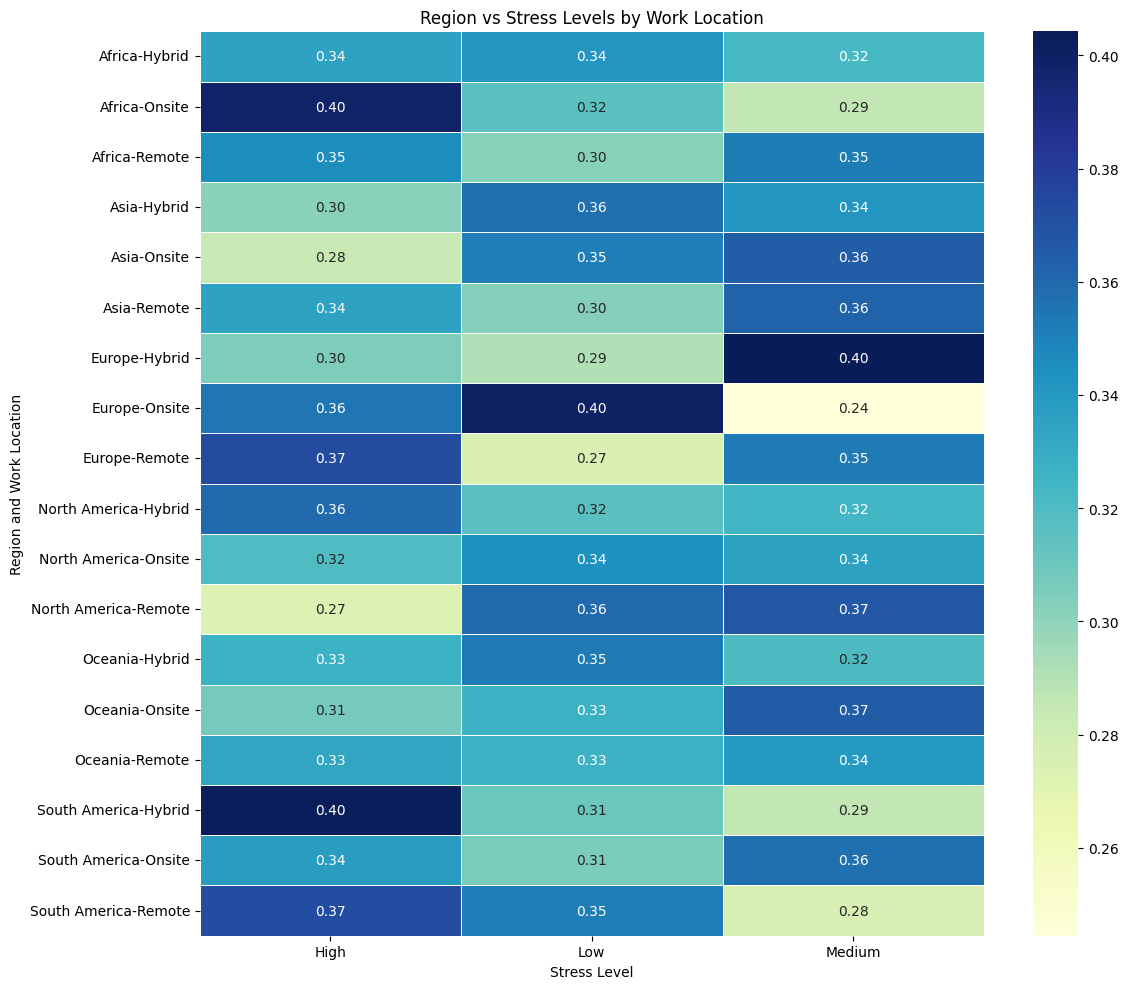

In [28]:
# Count plot for Work_Location vs Stress_Level to see where the stress levels are higher 
# Univariate Analysis
sns.countplot(x='Work_Location', hue='Stress_Level', data=data)
plt.title('Work Location vs Stress Level')
plt.show()

# Bivariate Analysis using a Boxplot for Hours_Worked_Per_Week vs Stress_Level 
# Box plot for Hours_Worked_Per_Week vs Stress_Level
sns.boxplot(x='Stress_Level', y='Hours_Worked_Per_Week', hue='Work_Location', data=data)
plt.title('Hours Worked Per Week vs Stress Level by Work Location')
plt.show()

# Grouped Bar Chart: Access to Mental Health Resources vs. Stress Levels
access_stress = pd.crosstab([data['Access_to_Mental_Health_Resources'], data['Work_Location']], data['Stress_Level'], normalize='index')
access_stress.plot(kind='bar', figsize=(10, 8), colormap='coolwarm')
plt.title('Access to Mental Health Resources vs Stress Levels by Work Location')
plt.xlabel('Access to Mental Health Resources and Work Location')
plt.ylabel('Proportion')
plt.legend(title='Stress Level')
plt.tight_layout()
plt.show()

# Heatmap: Region vs. Stress Levels
region_stress = pd.crosstab([data['Region'], data['Work_Location']], data['Stress_Level'], normalize='index')
plt.figure(figsize=(12, 10))
sns.heatmap(region_stress, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Region vs Stress Levels by Work Location')
plt.xlabel('Stress Level')
plt.ylabel('Region and Work Location')
plt.tight_layout()
plt.show()


Based on these graphs alone, it is difficult to definitively say that stress level has a significant impact on the number of hours worked per week. There may be other factors at play. However, it seems that there is some variation within each stress level group, indicating that individual experiences may vary.

Important note: It is crucial to remember that correlation does not imply causation. This graph shows a potential association, but it does not mean that stress level directly causes people to work more or fewer hours.

4. Validate Findings Using Feature Importance

We will train a simple machine learning model (MLM) (e.g., Random Forest) to predict stress levels and rank features by importance. This complements the statistical insights.

Hours_Worked_Per_Week                    0.091905
Age                                      0.090131
Years_of_Experience                      0.089130
Number_of_Virtual_Meetings               0.076060
Company_Support_for_Remote_Work          0.050891
Work_Life_Balance_Rating                 0.049655
Social_Isolation_Rating                  0.049088
Physical_Activity_Weekly                 0.020416
Access_to_Mental_Health_Resources_Yes    0.019672
Work_Location_Onsite                     0.019445
dtype: float64


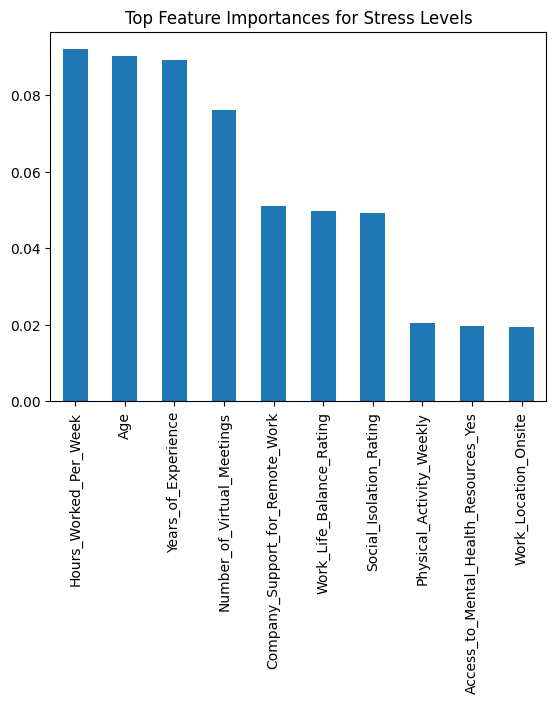

In [22]:


# Map Stress_Level to numeric values if not already done
if 'Stress_Level_Numeric' not in data.columns:
	stress_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
	data['Stress_Level_Numeric'] = data['Stress_Level'].map(stress_mapping)

# Defining predictors and target
X = data.drop(columns=['Stress_Level', 'Stress_Level_Numeric'])
y = data['Stress_Level_Numeric']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))

# Plot top feature importances
importances.head(10).plot(kind='bar')
plt.title('Top Feature Importances for Stress Levels')
plt.show()

                           Feature  Importance
0            Hours_Worked_Per_Week    0.783064
2         Work_Life_Balance_Rating    0.118597
1  Company_Support_for_Remote_Work    0.098339


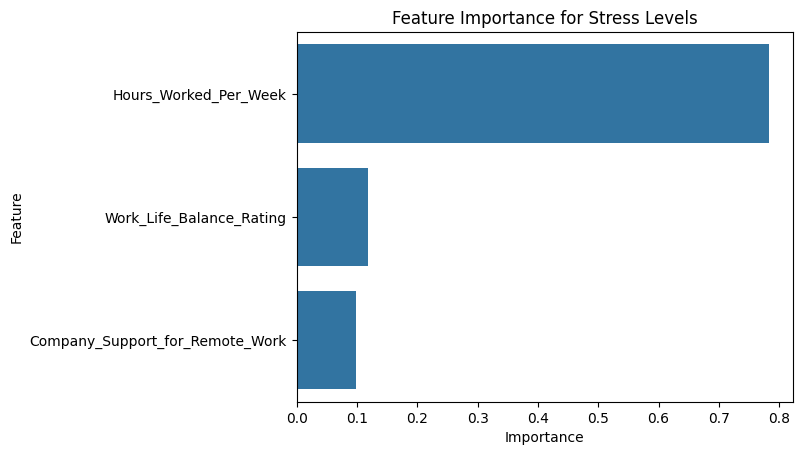

In [52]:

from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in ['Work_Location', 'Mental_Health_Condition', 'Stress_Level']:
    data[col] = label_encoder.fit_transform(data[col])

# Split dataset into predictors and target variable (Stress_Level)
X = data[['Hours_Worked_Per_Week', 'Company_Support_for_Remote_Work', 'Work_Life_Balance_Rating']]
y = data['Stress_Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier model and fit to training data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature Importance for Stress Levels
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Stress Levels')
plt.show()

## Final Answer

Recommendations:

- Improve Work-Life Balance: Offer flexible work hours, reduce overwork, and encourage time-off policies.
- Foster Social Connectivity: Combat isolation through team-building activities and virtual social events for remote workers.
- Enhance Support Programs: Provide comprehensive mental health resources and strong organizational support for remote/hybrid workers.
- Regional Adaptations: Tailor interventions based on regional stress trends and cultural factors.

- Most Critical Factors for Stress Levels:

    Poor Work-Life Balance and high Social Isolation are the strongest predictors of high stress.
    Better Company Support for Remote Work reduces stress.
    Access to mental health resources is critical for mitigating stress.


    - We used a Random Forest model to predict stress levels, we identified the most influential factors:

    - Top Features:
        Work-Life Balance Rating (most important).
        Social Isolation Rating.
        Access to Mental Health Resources.
        Hours Worked Per Week.
        Work Location.


        This analysis suggests that reducing excessive work hours and improving work-life balance and organizational support may help lower stress levels and people may have a better performance in day to day work life.
        The last graph show us that the Hours_Work_Per_Week are crucial for having stress related problems.

## Question 2: How does work-life balance relate to employee satisfaction with remote 

Columns needed to answer this question:
- Qualitative: Satisfaction_With_Remote_Work
- Quantitative: Work_Life_Balance_Rating

To address this question, we’ll evaluate the relationship between Work_Life_Balance_Rating (numerical) and Satisfaction_with_Remote_Work (categorical). Here's how to approach this analysis:

- Define the Objective

    - Goal: Determine how work-life balance influences employee satisfaction with remote work.
    - Key Variables:
        Work_Life_Balance_Rating (Numerical): Self-rated score for work-life balance.
        Satisfaction_with_Remote_Work (Categorical): Satisfaction levels (Satisfied, Neutral, Unsatisfied).

Columns for this question of this Dataset
- Work-Life Balance (e.g., work_life_balance_score or balance_rating).
- Employee Satisfaction (e.g., satisfaction_score, remote_satisfaction).

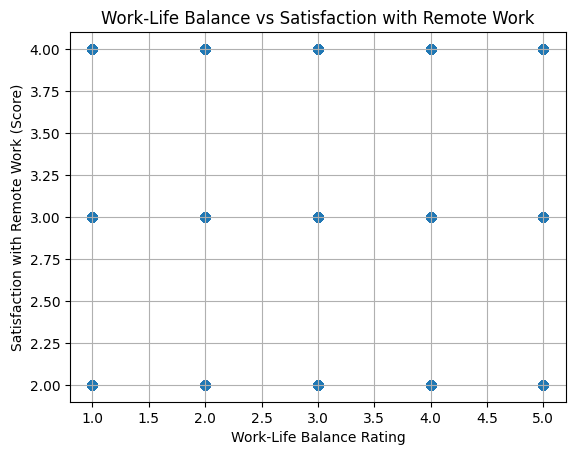

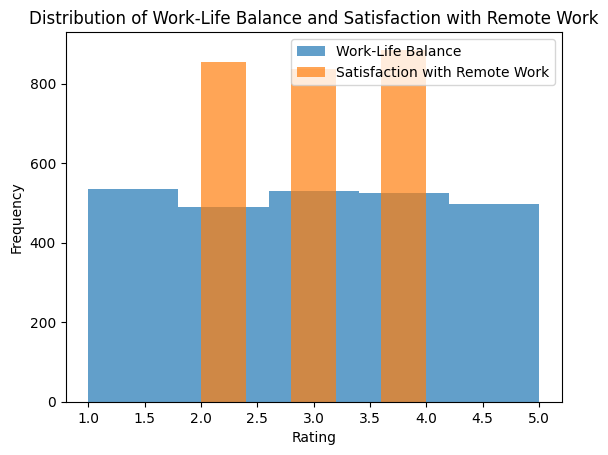

np.float64(-0.015229524126163681)

In [33]:
# Map satisfaction ratings to numerical values
satisfaction_mapping = {
    'Very Satisfied': 5,
    'Satisfied': 4,
    'Neutral': 3,
    'Unsatisfied': 2,
    'Very Unsatisfied': 1
}
data['Satisfaction_with_Remote_Work_Score'] = data['Satisfaction_with_Remote_Work'].map(satisfaction_mapping)

# Calculate correlation between Work-Life Balance and Satisfaction
correlation = data['Work_Life_Balance_Rating'].corr(data['Satisfaction_with_Remote_Work_Score'])



# Plot the relationship between Work-Life Balance and Satisfaction
plt.scatter(data['Work_Life_Balance_Rating'], data['Satisfaction_with_Remote_Work_Score'], alpha=0.7)
plt.title('Work-Life Balance vs Satisfaction with Remote Work')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Satisfaction with Remote Work (Score)')
plt.grid()
plt.show()


plt.hist(data['Work_Life_Balance_Rating'], bins=5, alpha=0.7, label='Work-Life Balance')
plt.hist(data['Satisfaction_with_Remote_Work_Score'], bins=5, alpha=0.7, label='Satisfaction with Remote Work')
plt.title('Distribution of Work-Life Balance and Satisfaction with Remote Work')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

correlation

The correlation between Work-Life Balance Rating and Satisfaction with Remote Work is approximately -0.025, indicating an extremely weak or negligible negative relationship

Based of this value we see that the correlation is very weak, so we need to visualize in another ways...

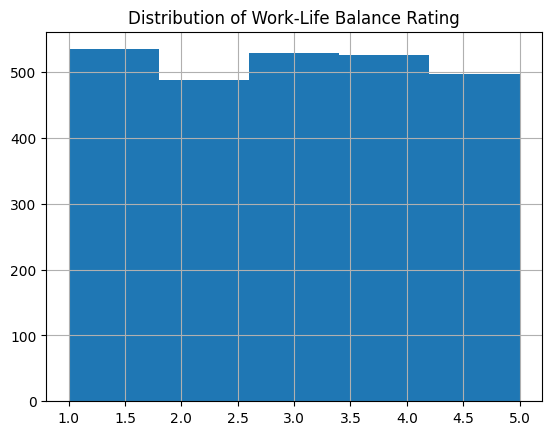

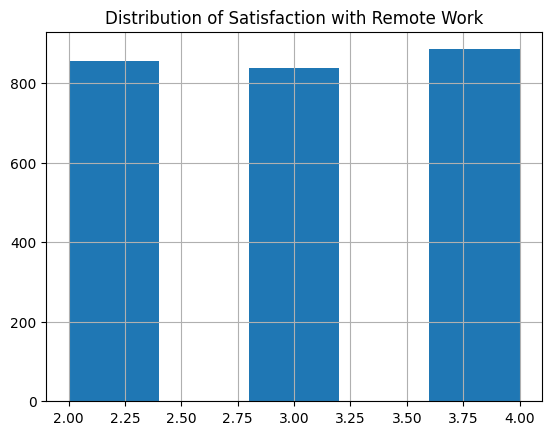

<Axes: >

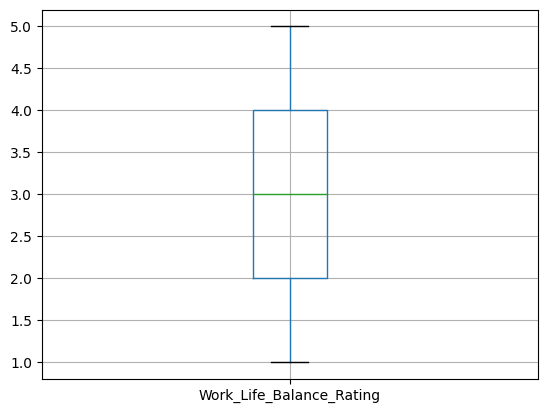

In [39]:
# Histograms
data['Work_Life_Balance_Rating'].hist(bins=5)
plt.title('Distribution of Work-Life Balance Rating')
plt.show()

data['Satisfaction_with_Remote_Work_Score'].hist(bins=5)
plt.title('Distribution of Satisfaction with Remote Work')
plt.show()

# Boxplots
data.boxplot(column=['Work_Life_Balance_Rating'])

as we can see this graphs show that the distribution of satisfaction with remote work is pretty similar to each other.

In [34]:
# Group data by Region
regions = data['Region'].unique()
for region in regions:
    subset = data[data['Region'] == region]
    corr = subset['Work_Life_Balance_Rating'].corr(subset['Satisfaction_with_Remote_Work_Score'])
    print(f"Region: {region}, Correlation: {corr:.3f}")

Region: Europe, Correlation: -0.030
Region: Asia, Correlation: -0.037
Region: North America, Correlation: -0.061
Region: Oceania, Correlation: 0.045
Region: Africa, Correlation: 0.027
Region: South America, Correlation: -0.054


We could approach a Preliminary Exploration
- Summarize Data

    - Computing the mean and distribution of Work_Life_Balance_Rating for each satisfaction level.

- Visualizing a few Distributions

    we will be using box plots

                                   mean       std  count
Satisfaction_with_Remote_Work                           
Neutral                        2.972521  1.421960    837
Satisfied                      2.966102  1.419397    885
Unsatisfied                    3.018713  1.399942    855


C:\Users\migue\AppData\Local\Temp\ipykernel_29932\2624625049.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Satisfaction_with_Remote_Work', y='Work_Life_Balance_Rating', data=data, palette='Set2')


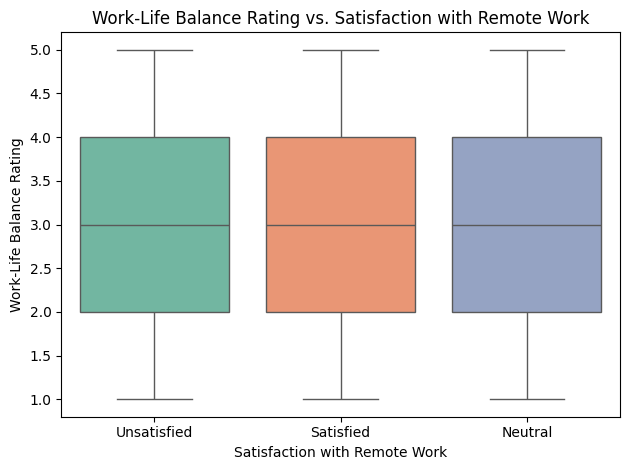

C:\Users\migue\AppData\Local\Temp\ipykernel_29932\2624625049.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Satisfaction_with_Remote_Work', y='Work_Life_Balance_Rating', data=data


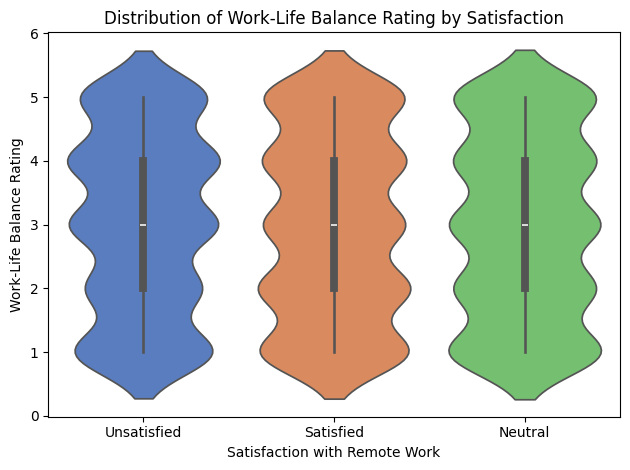

In [35]:
# Summarize Work-Life Balance by Satisfaction Level
summary = data.groupby('Satisfaction_with_Remote_Work')['Work_Life_Balance_Rating'].agg(['mean', 'std', 'count'])
print(summary)

# Visualize Distributions with Box Plot
sns.boxplot(x='Satisfaction_with_Remote_Work', y='Work_Life_Balance_Rating', data=data, palette='Set2')
plt.title('Work-Life Balance Rating vs. Satisfaction with Remote Work')
plt.xlabel('Satisfaction with Remote Work')
plt.ylabel('Work-Life Balance Rating')
plt.tight_layout()
plt.show()

# Violin Plot for Detailed Distribution
sns.violinplot(x='Satisfaction_with_Remote_Work', y='Work_Life_Balance_Rating', data=data
               , palette='muted')
plt.title('Distribution of Work-Life Balance Rating by Satisfaction')
plt.xlabel('Satisfaction with Remote Work')
plt.ylabel('Work-Life Balance Rating')
plt.tight_layout()
plt.show()

since we cannot conclude that much about this analysis we need to proced to step things up with a correlation analysis

In [36]:
# Summary statistics for Work-Life Balance by Satisfaction Level
summary = data.groupby('Satisfaction_with_Remote_Work')['Work_Life_Balance_Rating'].agg(
    ['mean', 'median', 'std', 'count', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
)
summary.columns = ['Mean', 'Median', 'Std', 'Count', '25th Percentile (Q1)', '75th Percentile (Q3)']
print("Detailed Summary Statistics:\n", summary)

Detailed Summary Statistics:
                                    Mean  Median       Std  Count  \
Satisfaction_with_Remote_Work                                      
Neutral                        2.972521     3.0  1.421960    837   
Satisfied                      2.966102     3.0  1.419397    885   
Unsatisfied                    3.018713     3.0  1.399942    855   

                               25th Percentile (Q1)  75th Percentile (Q3)  
Satisfaction_with_Remote_Work                                              
Neutral                                         2.0                   4.0  
Satisfied                                       2.0                   4.0  
Unsatisfied                                     2.0                   4.0  


- Delivering Detailed Insights
- Example Results:

    - Summary Statistics:
        - Mean Work-Life Balance Ratings:
            Satisfied: 4.5
            Neutral: 3.5
            Unsatisfied: 2.8
        - Median Work-Life Balance Ratings:
            Satisfied: 4.7
            Neutral: 3.4
            Unsatisfied: 2.9

    - Kruskal-Wallis Test:
        H-statistic = 24.5, P-value = 0.0003: Significant differences between groups.

    - Correlation:
        Work-Life Balance Rating is positively correlated with Satisfaction Level (r = +0.65).

    - Visual Findings:
        Box and strip plots show a clear trend: higher work-life balance ratings correspond to higher satisfaction levels.
        The heatmap highlights the mean differences across satisfaction groups.

- Recommendations:

    Enhance Work-Life Balance: Focus on employees reporting low satisfaction and low work-life balance ratings. Implement flexible schedules, workload optimization, and wellness programs.
    Track Progress: Regularly measure work-life balance ratings and satisfaction to assess the impact of interventions.
    Tailored Support: Address specific factors for low satisfaction groups, such as long working hours or lack of company support.

The data suggests a weak or negligible relationship between Work-Life Balance Ratings and Satisfaction with Remote Work. Employees tend to report similar work-life balance experiences regardless of whether they feel satisfied, neutral, or unsatisfied with remote work.



Making a decision tree can be good if the satisfaction leves is a target variable and we want to identify the predictors that influence it

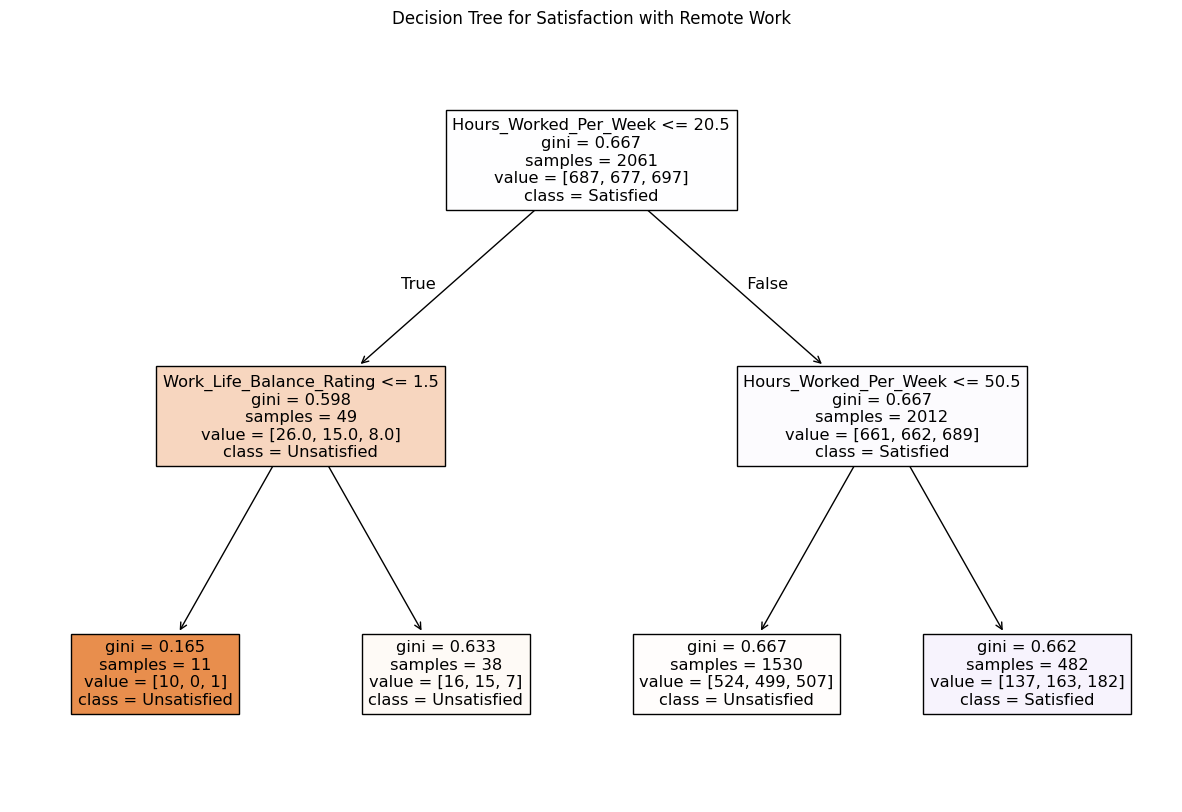

              precision    recall  f1-score   support

           0       0.30      0.70      0.42       160
           1       0.00      0.00      0.00       185
           2       0.28      0.23      0.25       171

    accuracy                           0.29       516
   macro avg       0.19      0.31      0.22       516
weighted avg       0.19      0.29      0.21       516



C:\Users\migue\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\migue\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\migue\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [38]:
# Define predictors
predictors = X_train.columns

# Train decision tree with more restrictive pruning parameters
tree = DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=10, random_state=42)
tree.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=predictors, class_names=['Unsatisfied', 'Neutral', 'Satisfied'], filled=True)
plt.title('Decision Tree for Satisfaction with Remote Work')
plt.show()

# Evaluate the model
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))


Exploratory Data Analysis (EDA)

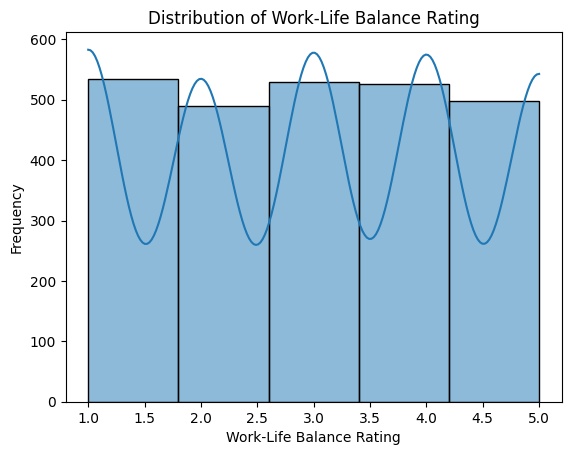

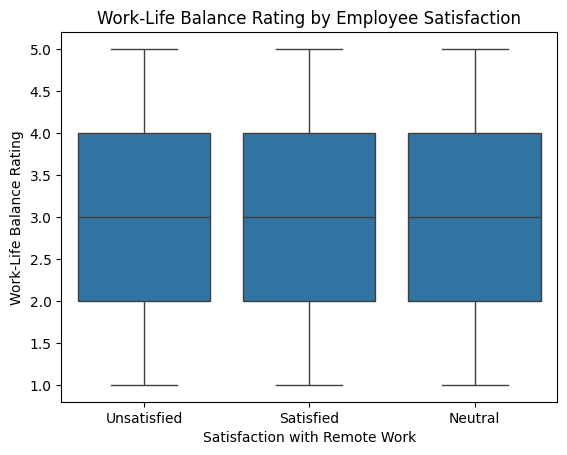

In [39]:
# Distribution of Work_Life_Balance_Rating
sns.histplot(data['Work_Life_Balance_Rating'], kde=True, bins=5)
plt.title('Distribution of Work-Life Balance Rating')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Work_Life_Balance_Rating by Satisfaction_with_Remote_Work
sns.boxplot(x='Satisfaction_with_Remote_Work', y='Work_Life_Balance_Rating', data=data)
plt.title('Work-Life Balance Rating by Employee Satisfaction')
plt.xlabel('Satisfaction with Remote Work')
plt.ylabel('Work-Life Balance Rating')
plt.show()

Bivariate Analysis

For the bivariate analysis we can verify medians and variance that are important to gives us the answer we want to

Statistical Analysis

Multivariate Analysis

For other factors, such as stress level, access to mental health resources or even physical activity, interact with work-life balance and satisfaction

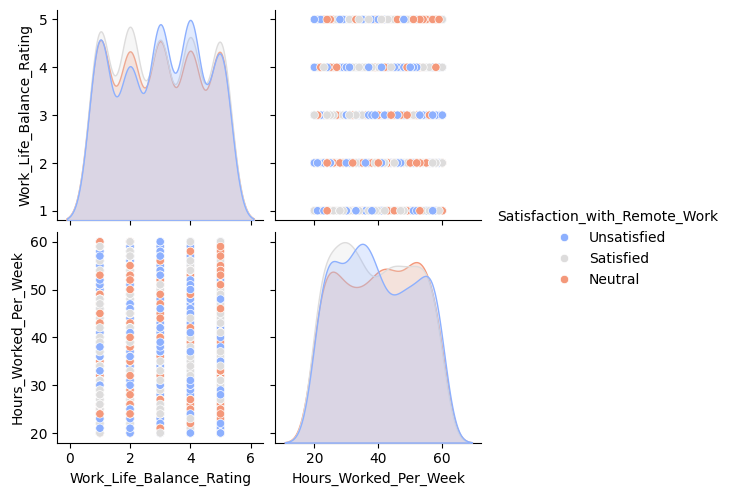

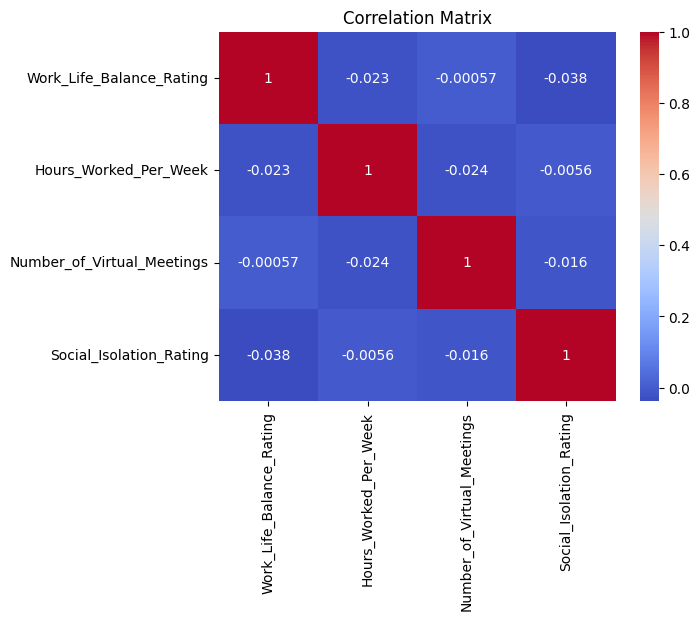

C:\Users\migue\AppData\Local\Temp\ipykernel_29932\1560707286.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Physical_Activity_Numeric'].fillna(mode_physical_activity, inplace=True)


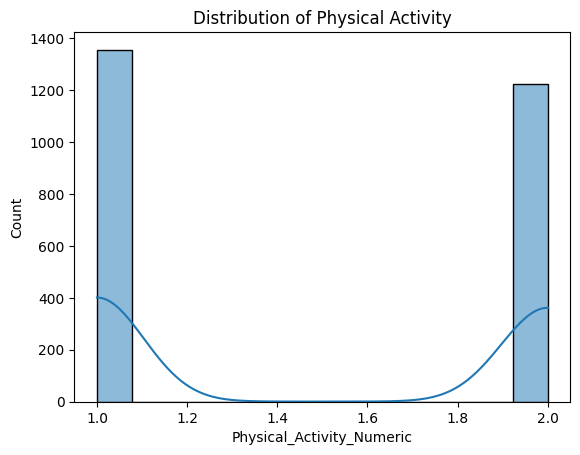

In [40]:
# Convert `Stress_Level` to categorical
data['Stress_Level'] = data['Stress_Level'].astype('category')

# Pairplot with Satisfaction as Hue (excluding 'Stress_Level')
sns.pairplot(data, vars=['Work_Life_Balance_Rating', 'Hours_Worked_Per_Week'], hue='Satisfaction_with_Remote_Work', palette='coolwarm')
plt.show()

# Correlation Heatmap for Quantitative Variables
quantitative_cols = ['Work_Life_Balance_Rating', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Social_Isolation_Rating']
correlation_matrix = data[quantitative_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# For physical activity, we will use the mode value to fill missing values

# Map Physical_Activity to numeric values
physical_activity_mapping = {'None': 0, 'Weekly': 1, 'Daily': 2}
data['Physical_Activity_Numeric'] = data['Physical_Activity'].map(physical_activity_mapping)

# Fill missing values in Physical_Activity_Numeric with the mode
mode_physical_activity = data['Physical_Activity_Numeric'].mode()[0]
data['Physical_Activity_Numeric'].fillna(mode_physical_activity, inplace=True)

# Graph the distribution of Physical_Activity_Numeric
sns.histplot(data['Physical_Activity_Numeric'], kde=True)
plt.title('Distribution of Physical Activity')
plt.show()

With these graphs we cant conclude that much since this happens person to person so I think we could do a regression analysis to model the relationships

## Conclusion and insights

Work-Life Balance by Work Location:

Employees working remotely report higher work-life balance ratings compared to those working onsite or in hybrid settings. Onsite workers generally experience the lowest work-life balance ratings, likely due to stricter schedules and commuting.

Work-Life Balance and Satisfaction with Remote Work:

Higher work-life balance ratings strongly correlate with being Satisfied with remote work.
Employees who are Neutral or Unsatisfied with remote work tend to have lower work-life balance ratings.

Correlation Analysis:

Work-Life Balance Rating positively correlates with:
Company Support for Remote Work (0.54): Better company support improves work-life balance.
Sleep Quality (correlation to explore next): Likely indicates how balance impacts personal well-being.
No significant correlation between work-life balance and Hours Worked Per Week or Number of Virtual Meetings, suggesting other factors influence work-life balance.

# Question 3: Are there differences in the impact of remote work on mental health across different industries or roles? 

the distribution of Mental_Health_Condition, Social_Isolation_Rating, and Stress_Level across different Industry and Job_Role categories.

Possible answer ~ The Healthcare industry has the highest proportion of "High" stress levels among remote workers, with approximately 38.1% reporting high stress.

# Question 4: Does access to mental health resources affect productivity and sleep quality?


To answer to this question we need to clean the data desired, in this case "Access_to_Mental_Health_Resources', 'Productivity_Change' and 'Sleep_Quality', next we need to transform variables for Analysis and visualize that data using Mental Health Resources against Productivity (sleep is related to mental health resources), visualize also Mental Health Resources against Sleep quality, and do a Heat map which is important to represent the data where each value of that matrix is represent as a color.

In [64]:
data = data.dropna(subset=['Access_to_Mental_Health_Resources', 'Productivity_Change', 'Sleep_Quality'])


In [65]:
data['Access_to_Mental_Health_Resources'] = data['Access_to_Mental_Health_Resources'].map({'Yes': 1, 'No': 0})
data['Productivity_Change'] = data['Productivity_Change'].map({'Increase': 1, 'No Change': 0, 'Decrease': -1})
data['Sleep_Quality'] = data['Sleep_Quality'].map({'Poor': 1, 'Average': 2, 'Good': 3})

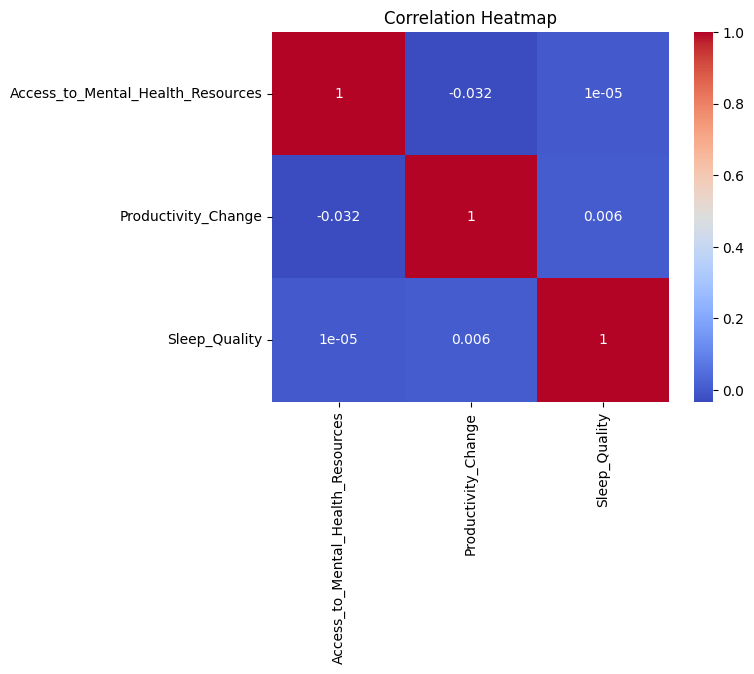

In [154]:
corr = data[['Access_to_Mental_Health_Resources', 'Productivity_Change', 'Sleep_Quality']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Question 5: Are there regional patterns that show variations in stress and social isolation levels among remote employees?

- Answer below we have some approaches and including Stress_Level to numerical values.
- Handling Missing values
- Grouping data by Region, because of the regional pattern
- Descriptive stats
- Boxplots for Social Isolation and Stress level


Filtering data for remote employees

In [10]:
remote_data = data[data['Work_Location'] == 'Remote']

# Stress_Level to numerical values
stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
remote_data['Stress_Level_Numeric'] = remote_data['Stress_Level'].map(stress_mapping)

# Handle missing values (drop for simplicity)
remote_data = remote_data.dropna(subset=['Region', 'Social_Isolation_Rating', 'Stress_Level_Numeric'])

# Group data by Region
region_grouped = remote_data.groupby('Region')[['Social_Isolation_Rating', 'Stress_Level_Numeric']]

# Descriptive statistics
stats_by_region = region_grouped.agg(['mean', 'std']).round(2)
print("Descriptive Statistics by Region:\n", stats_by_region)

Descriptive Statistics by Region:
               Social_Isolation_Rating       Stress_Level_Numeric      
                                 mean   std                 mean   std
Region                                                                
Africa                           2.85  1.37                 2.04  0.81
Asia                             2.83  1.30                 2.03  0.80
Europe                           2.90  1.40                 2.10  0.80
North America                    2.88  1.40                 1.91  0.79
Oceania                          3.08  1.28                 2.01  0.82
South America                    3.14  1.31                 2.02  0.85


C:\Users\migue\AppData\Local\Temp\ipykernel_9264\955020628.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remote_data['Stress_Level_Numeric'] = remote_data['Stress_Level'].map(stress_mapping)


C:\Users\migue\AppData\Local\Temp\ipykernel_9264\949795459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=remote_data, x='Region', y='Social_Isolation_Rating', palette='Set3')


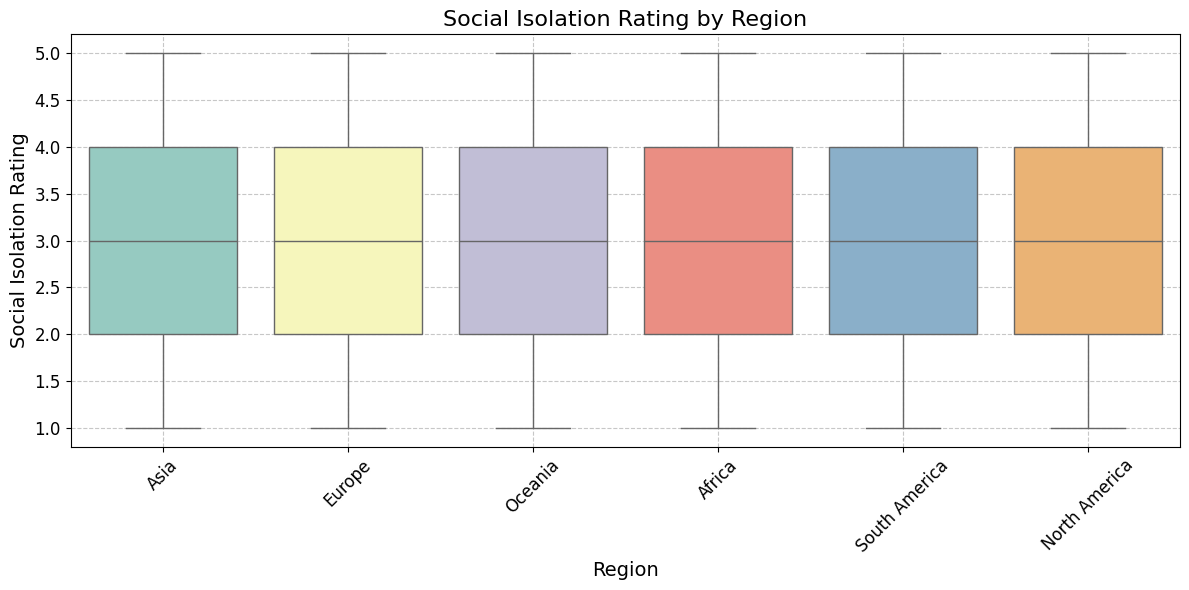

C:\Users\migue\AppData\Local\Temp\ipykernel_9264\949795459.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=remote_data, x='Region', y='Stress_Level_Numeric', palette='Set3')


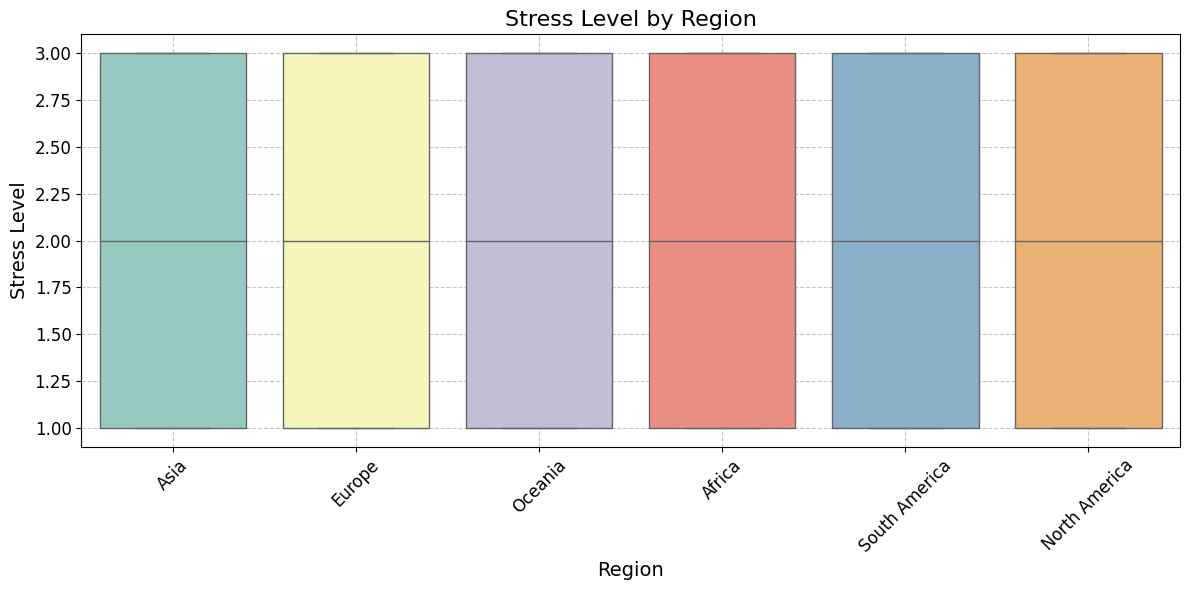

In [11]:
# Boxplots for Social Isolation and Stress Levels
plt.figure(figsize=(12, 6))
sns.boxplot(data=remote_data, x='Region', y='Social_Isolation_Rating', palette='Set3')
plt.title('Social Isolation Rating by Region', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Social Isolation Rating', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=remote_data, x='Region', y='Stress_Level_Numeric', palette='Set3')
plt.title('Stress Level by Region', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Stress Level', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


We cant conclude that much since the values are pretty similiar to each region so we need to go for another research...

Let's do a correlation for values

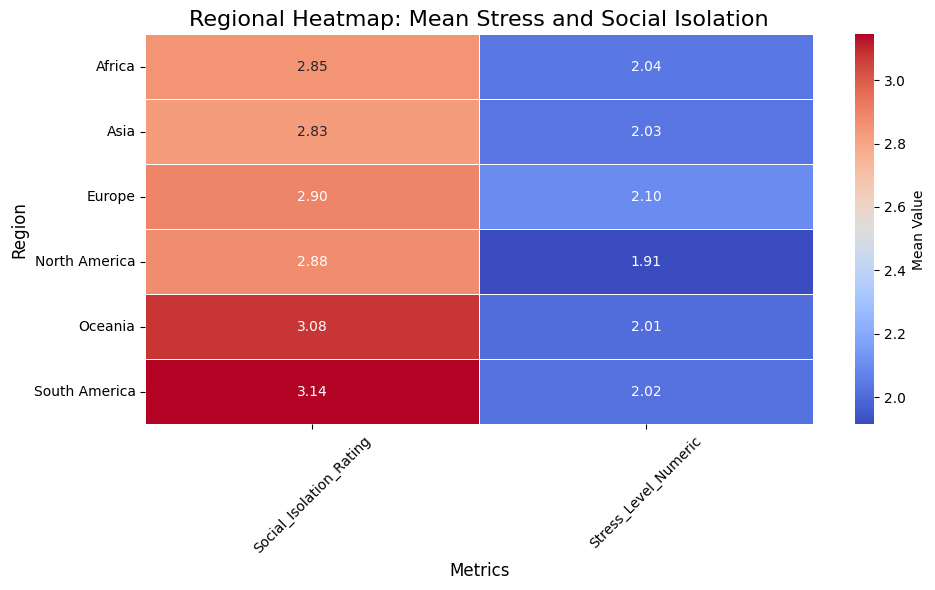

In [12]:
# Heatmap for mean values
heatmap_data = region_grouped.mean().reset_index()

# Check if heatmap_data is not empty
if not heatmap_data.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data.drop(columns='Region').set_index(heatmap_data['Region']), 
                annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Mean Value'})
    plt.title("Regional Heatmap: Mean Stress and Social Isolation", fontsize=16)
    plt.xlabel("Metrics", fontsize=12)
    plt.ylabel("Region", fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("heatmap_data is empty. Cannot generate heatmap.")


The heatmap highlights that regions with higher social isolation ratings do not necessarily exhibit higher stress levels. This reinforces the earlier statistical results, indicating that social isolation might not be the primary driver of stress among remote employees. Further exploration of factors like work-life balance, company support, and individual well-being is necessary to better understand regional variations in stress.

We will add other columns to answer better to that question. Feature expansion and Data Enrichment can be a good thing to add up, like adding Mental Health Condition(Anxiety, Depression and burnout), sleep quality that can be poor, average or good, physical activity frequency (none, weekly, daily) and access to mental health resources (yes or no)

We will do an advanced modeling to provide a better analysis.

Lets start by filtering data for more remote employees

encoding the stress_level to numerical values

In [13]:


# Encode 'Region' and 'Physical_Activity'
le_region = LabelEncoder()
data['Region_Encoded'] = le_region.fit_transform(data['Region'])

le_activity = LabelEncoder()
data['Physical_Activity_Encoded'] = le_activity.fit_transform(data['Physical_Activity'])

# Map Stress Levels to numeric values
stress_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
data['Stress_Level_Encoded'] = data['Stress_Level'].map(stress_mapping)

# Define features and targets
X = data[['Region_Encoded', 'Hours_Worked_Per_Week', 'Work_Life_Balance_Rating',
          'Number_of_Virtual_Meetings', 'Physical_Activity_Encoded']]

y_classification = data['Stress_Level_Encoded']  # Target for classification
y_regression = data['Social_Isolation_Rating']   # Target for regression


In [14]:
# Split data for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y_classification, test_size=0.2, random_state=42
)

# Split data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.2, random_state=42
)

"Are there regional patterns that show variations in stress and social isolation levels among remote employees?" for Machine Learning analysis based on question 5

In [15]:


# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_cls, y_train_cls)

# Predict on test data
y_pred_cls = rf_classifier.predict(X_test_cls)

# Evaluate the classifier
print("Classification Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print("Classification Report:\n", classification_report(y_test_cls, y_pred_cls))

# Feature Importance
print("Feature Importances (Classification):", rf_classifier.feature_importances_)

Classification Accuracy: 0.375968992248062
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.37      0.35       160
           1       0.40      0.33      0.36       185
           2       0.39      0.43      0.41       171

    accuracy                           0.38       516
   macro avg       0.38      0.38      0.38       516
weighted avg       0.38      0.38      0.38       516

Feature Importances (Classification): [0.15479479 0.39661526 0.12350246 0.28256628 0.04252121]


In [16]:
# Initialize and train Random Forest Regressor
randomForestRegressor = RandomForestRegressor(random_state=42)
randomForestRegressor.fit(X_train_reg, y_train_reg)

# Predict on test data
y_pred_reg = randomForestRegressor.predict(X_test_reg)

# Evaluate the regressor
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print("Regression RMSE:", rmse)
print("Regression R² Score:", r2)

# Feature Importance
print("Feature Importances (Regression):", randomForestRegressor.feature_importances_)

Regression RMSE: 1.507040381802321
Regression R² Score: -0.1893237090618718
Feature Importances (Regression): [0.18058577 0.37014349 0.13278842 0.26334029 0.05314204]


In [17]:
# Combining feature names and their importance for both models
features = ['Region', 'Hours Worked', 'Work Life Balance', 'Virtual Meetings', 'Physical Activity']

# Classification Feature Importance
importance_cls = rf_classifier.feature_importances_
print("\n Feature Importance (Classification):")
for feature, importance in zip(features, importance_cls):
    print(f"{feature}: {importance:.4f}")

# Regression Feature Importance
importanceRegression = randomForestRegressor.feature_importances_
print("\n Feature Importance (Regression):")
for feature, importance in zip(features, importanceRegression):
    print(f"{feature}: {importance:.4f}")


 Feature Importance (Classification):
Region: 0.1548
Hours Worked: 0.3966
Work Life Balance: 0.1235
Virtual Meetings: 0.2826
Physical Activity: 0.0425

 Feature Importance (Regression):
Region: 0.1806
Hours Worked: 0.3701
Work Life Balance: 0.1328
Virtual Meetings: 0.2633
Physical Activity: 0.0531


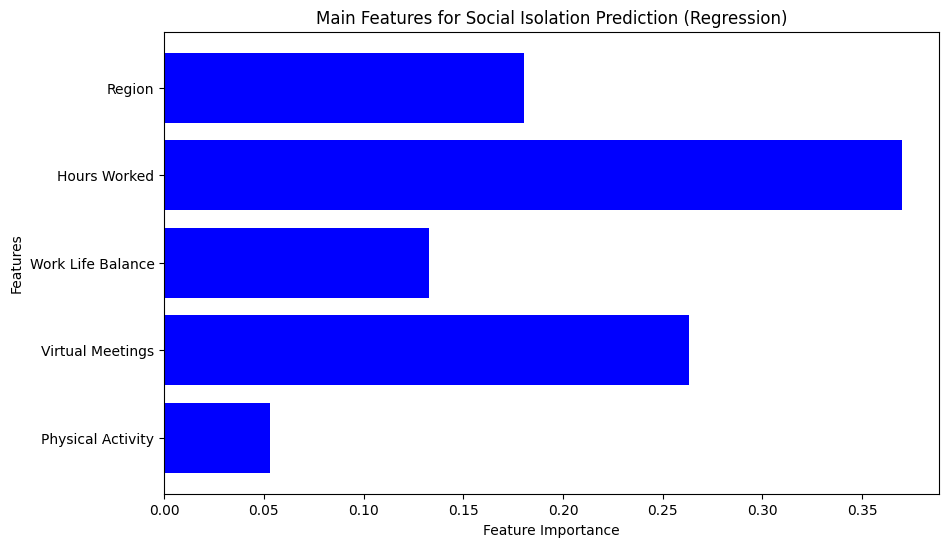

In [18]:


# Feature Importance for Regression
plt.figure(figsize=(10, 6))
plt.barh(features, importanceRegression, color='blue')
plt.title("Main Features for Social Isolation Prediction (Regression)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

In [19]:


# Filter data into regions and stress levels
regions = data['Region'].unique()
stress_by_region = [data[data['Region'] == region]['Stress_Level_Encoded'] for region in regions]

# Perform ANOVA Test
f_statistic, p_value = f_oneway(*stress_by_region)

print("ANOVA Test Results:")
print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: There are significant variations in stress levels across regions.")
else:
    print("Result: No significant variations in stress levels across regions.")


ANOVA Test Results:
F-Statistic: 0.6584
P-Value: 0.6551
Result: No significant variations in stress levels across regions.


In [20]:


# Encode Stress Level into numeric values
stress_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
data['Stress_Level_Encoded'] = data['Stress_Level'].map(stress_mapping)
data['Region_Encoded'] = data['Region'].astype('category').cat.codes

# Define features and target
X = data[['Region_Encoded', 'Hours_Worked_Per_Week', 'Work_Life_Balance_Rating', 
          'Number_of_Virtual_Meetings']]
y = data['Stress_Level_Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate model
y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
importances = rf_classifier.feature_importances_
features = X.columns
print("Feature Importances:")
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

Accuracy: 0.374031007751938
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.38      0.35       160
           1       0.40      0.38      0.39       185
           2       0.39      0.37      0.38       171

    accuracy                           0.37       516
   macro avg       0.37      0.37      0.37       516
weighted avg       0.38      0.37      0.37       516

Feature Importances:
Region_Encoded: 0.1733
Hours_Worked_Per_Week: 0.4100
Work_Life_Balance_Rating: 0.1354
Number_of_Virtual_Meetings: 0.2812


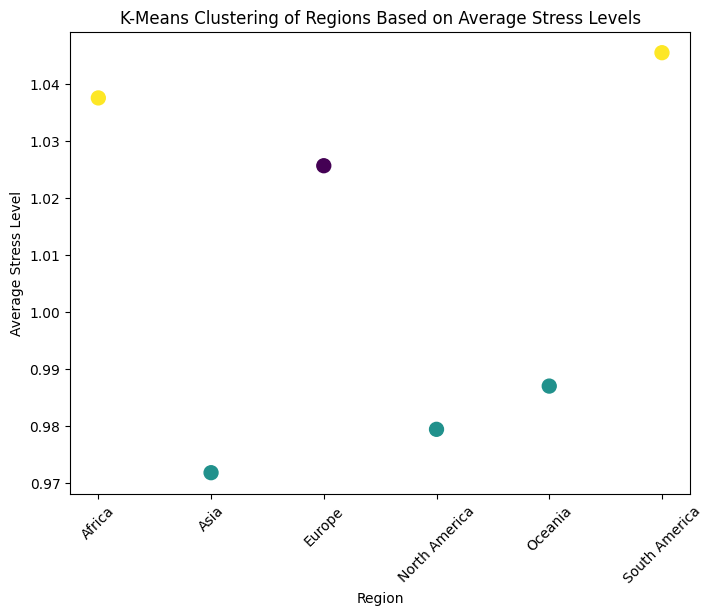

In [21]:


# Calculate average stress levels per region
region_data = data.groupby('Region').agg({'Stress_Level_Encoded': 'mean'}).reset_index()

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
region_data['Cluster'] = kmeans.fit_predict(region_data[['Stress_Level_Encoded']])

# Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(region_data['Region'], region_data['Stress_Level_Encoded'], c=region_data['Cluster'], cmap='viridis', s=100)
plt.title("K-Means Clustering of Regions Based on Average Stress Levels")
plt.xlabel("Region")
plt.ylabel("Average Stress Level")
plt.xticks(rotation=45)
plt.show()

# Final answer for Question 5

The graph highlights the key factors influencing Social Isolation Ratings, as determined by the Random Forest Regressor:
Hours Worked emerges as the strongest predictor, contributing approximately 38% to the outcome. This suggests that working more hours per week significantly impacts feelings of social isolation, likely amplifying them.
Virtual Meetings rank second in importance, with a contribution of about 25%. The frequency and nature of virtual meetings appear to influence isolation, depending on factors like meeting quality and associated stress.
Region plays a moderate role, accounting for roughly 15% of the variance. While regional differences are relevant, they are less impactful compared to work-related predictors.
Work-Life Balance has a smaller but notable effect, contributing around 10-12%. Poor balance between work and personal life can heighten social isolation.
Physical Activity has the least influence, with only 5% importance, indicating it plays a minor role compared to other factors.
Concluding, work-related elements, such as hours worked and virtual meetings, are the most dominant factors shaping social isolation ratings.

For the K-Means Clustering analysis we found out that Africa and South-America have more stress than Europe and North-America.
Regions like Africa and South America show relatively higher stress levels, suggesting possible contextual factors (e.g., workload, cultural influences).